# Exploration des données de Sirene

Nous disposons de deux jeux de données :
- `LIBELLES_POCAPE.csv` : jeu d'entraînement ;
- `JEU_EVALUATION` : jeu de test ou d'évaluation ;

## Chargement des données

In [6]:
import pandas as pd

df = pd.read_csv("../data/LIBELLES_POCAPE.csv", sep=";")

In [7]:
df.head()

,NumeroLiasse,LIBELLE,NATURE,SEDENTARITE,CODE,auto,EVT,CPRO
0,A00990001491,PROJET HUMANITAIRE DANS LE BUT DE CONSTRUIRE E...,NR,N,9499Z,S,1,M
1,A00990001509,EDUCATION RECHERCHE ET ENSEIGNEMENT EN NEUROR...,NR,N,7219Z,S,1,M
2,A00990001517,ORGANISER UN STAGE HUMANITAIRE AU CAMBODGE,NR,N,9499Z,S,1,M
3,A00990001525,AIDE LOGISTIQUE ET FINANCIERE POUR DES PILOTES...,NR,N,9319Z,S,1,M
4,A00990001533,ACCOMPAGNER LES PERSONNES AU DEVELOPPEMENT DE ...,NR,N,8299Z,S,1,M


Les variables du jeu de données sont les suivantes :
- numeroLiasse : Identifiant de la liasse ;
- LIBELLE : Libellé déclaré  ;
- NATURE : Nature de l'activité (NR si non renseignée) ;
- SEDENTARITE : Caractère sédentaire ou non de l'activité (modalité N lorsque l'activité est sédentaire sinon A pour ambulant et F pour forain) ;
- CODE : Code APE déterminé pour le libellé d'activité (soit automatiquement, soit par le gestionnaire) ;
- auto : Type de liasse ;
- EVT : Code événement ;
- CPRO : Type de personne (personne physique, personne morale ou exploitation en commun).

## Statistiques descriptives 

In [8]:
len(df)

1444829

Le jeu de données comporte 1.44M d'observations.

In [21]:
df.duplicated().sum()

0

### Nature de l'activité

[Text(0.5, 0, "Nature de l'activité"), Text(0, 0.5, "Nombre d'établissements")]

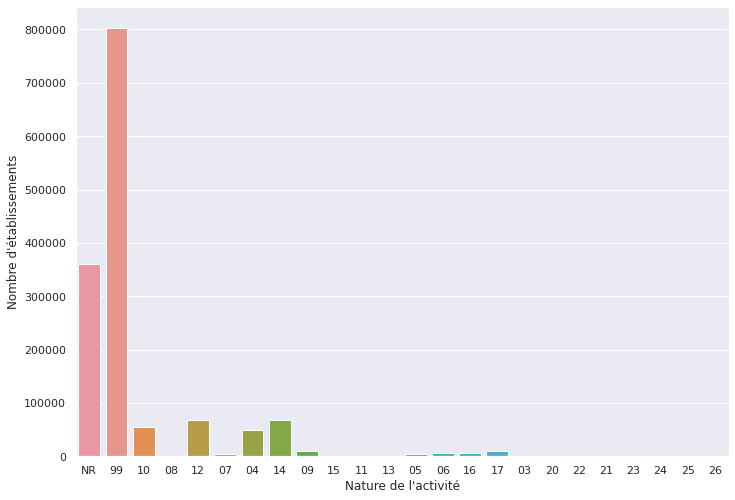

In [16]:
import seaborn as sns

sns.set_theme(style="whitegrid")
sns.set(rc={"figure.figsize": (11.7, 8.27)})

ax = sns.countplot(x="NATURE", data=df)
ax.set(xlabel="Nature de l'activité", ylabel="Nombre d'établissements")

### Sédentarité

[Text(0.5, 0, 'Sédentarité'), Text(0, 0.5, "Nombre d'établissements")]

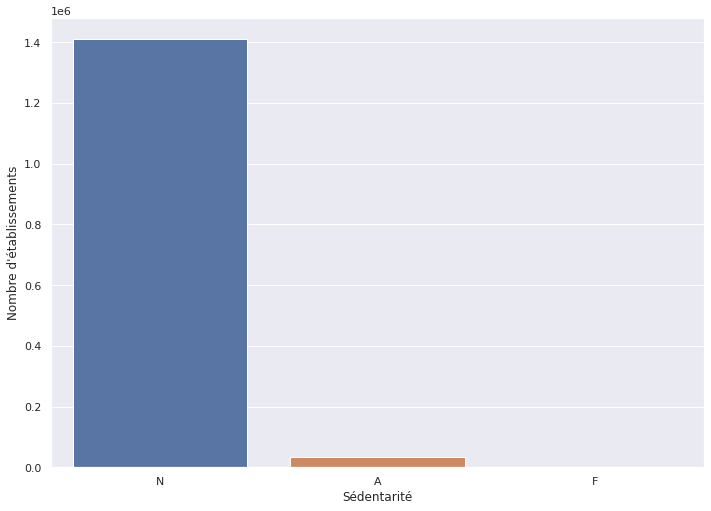

In [17]:
ax = sns.countplot(x="SEDENTARITE", data=df)
ax.set(xlabel="Sédentarité", ylabel="Nombre d'établissements")

### Type de liasse

[Text(0.5, 0, 'Type de liasse'), Text(0, 0.5, "Nombre d'établissements")]

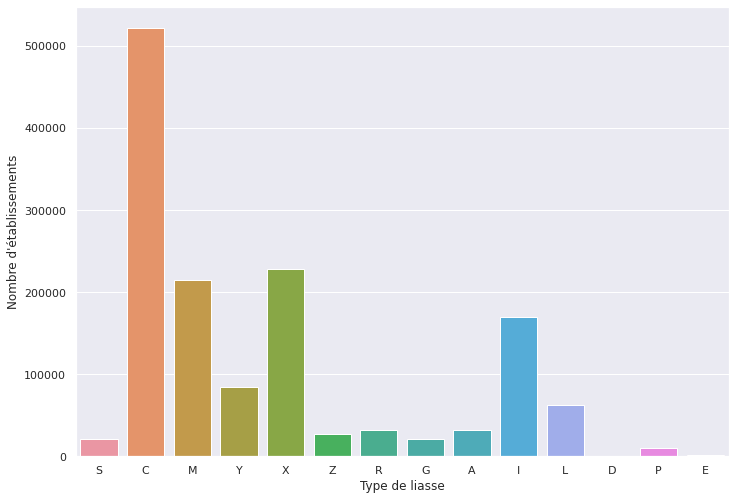

In [18]:
ax = sns.countplot(x="auto", data=df)
ax.set(xlabel="Type de liasse", ylabel="Nombre d'établissements")

### Code évènement

[Text(0.5, 0, 'Code évènement'), Text(0, 0.5, "Nombre d'établissements")]

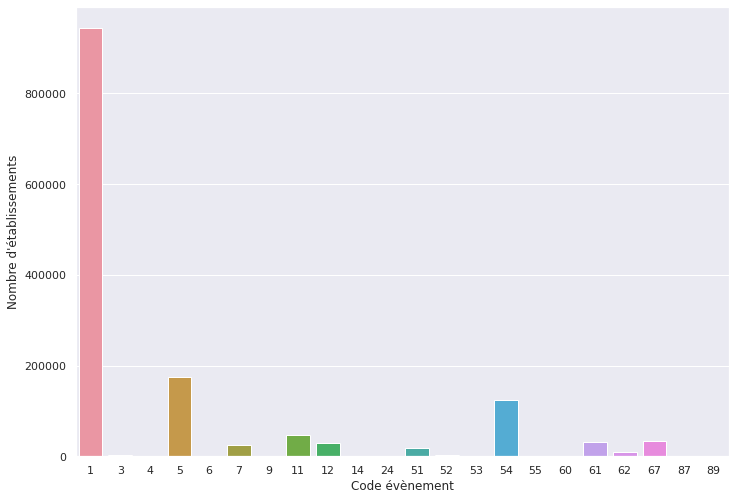

In [19]:
ax = sns.countplot(x="EVT", data=df)
ax.set(xlabel="Code évènement", ylabel="Nombre d'établissements")

### Type de personne

[Text(0.5, 0, 'Type de personne'), Text(0, 0.5, "Nombre d'établissements")]

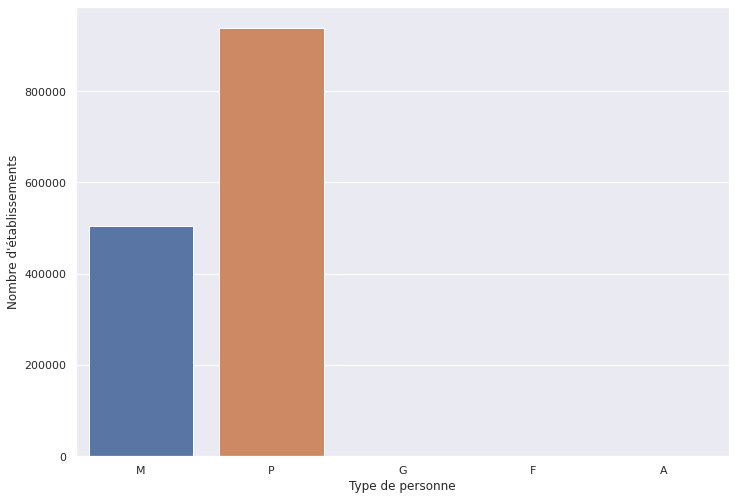

In [20]:
ax = sns.countplot(x="CPRO", data=df)
ax.set(xlabel="Type de personne", ylabel="Nombre d'établissements")

### Activité

In [23]:
df["CODE"].nunique()

715

715 codes d'activité différents - il y a 732 sous-classes dans la NAF2.

In [24]:
df["CODE_1"] = df["CODE"].str[:1]

[Text(0.5, 0, "Section d'activité"), Text(0, 0.5, "Nombre d'établissements")]

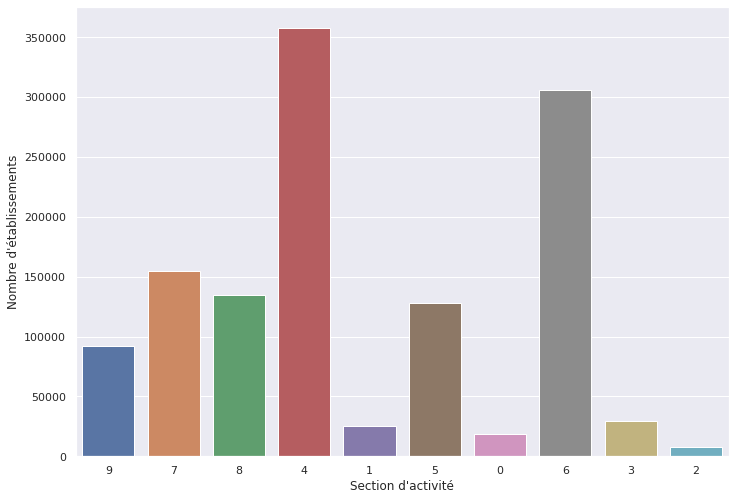

In [25]:
ax = sns.countplot(x="CODE_1", data=df)
ax.set(xlabel="Section d'activité", ylabel="Nombre d'établissements")

### Libellé

In [29]:
df["LIBELLE"].duplicated(keep=False).head(30)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10     True
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18     True
19    False
20     True
21     True
22    False
23    False
24     True
25    False
26    False
27    False
28     True
29    False
Name: LIBELLE, dtype: bool

In [27]:
df["LIBELLE"].head(30)

0     PROJET HUMANITAIRE DANS LE BUT DE CONSTRUIRE E...
1     EDUCATION  RECHERCHE ET ENSEIGNEMENT EN NEUROR...
2            ORGANISER UN STAGE HUMANITAIRE AU CAMBODGE
3     AIDE LOGISTIQUE ET FINANCIERE POUR DES PILOTES...
4     ACCOMPAGNER LES PERSONNES AU DEVELOPPEMENT DE ...
5                  SOLIDARITE   ENTRAIDE DES MILITAIRES
6     RASSEMBLEMENTS AVEC EXPOSITIONS ET ACCEUIL DE ...
7                 ATTACHE A UNE ECOLE APRES DESIGNATION
8            MANDATAIRE FINANCIER D ELECTION MUNICIPALE
9                     SENSIBILISATION A L ENVIRONNEMENT
10                                                SPORT
11                   ACTION CARITATIVE ET COMMEMORATIVE
12       RASSEMBLEMENTS ET POSSIBILITE EVENEMENT ANNUEL
13                      ORGANISATION DE SOIREE CONCERTS
14    ANIMATION DE LA VIE CULTURELLE A BERNAY ET SES...
15    ACCOMPAGNEMENT  INFORMATION ET FORMATION DE PE...
16    ACTIVITES DE SOUTIEN AU DEVELOPPEMENT ECONOMIQ...
17                                 CREATION DEVE

In [31]:
df["LIBELLE"].duplicated(keep=False).sum() / len(df)

0.7093046997257115

70% des libellés apparaissent plus d'une fois.